# Introduction to Machine Learning with the Adult Census Dataset

Welcome to this hands-on tutorial! We'll learn the fundamentals of machine learning by working through a complete project from start to finish.

## What You'll Learn

1. **Data Exploration** - Understanding your data before modeling
2. **Data Cleaning & Preprocessing** - Preparing data for machine learning
3. **Linear Regression** - Predicting continuous values
4. **Logistic Regression** - Classifying into categories
5. **Model Evaluation** - Measuring how well our models perform

## The Dataset

We'll use the **Adult Census Income** dataset, which contains demographic information about individuals. The main task is to predict whether someone earns more than $50K/year based on features like age, education, occupation, etc.

---

## Part 1: Setting Up and Loading Data

First, let's import the libraries we need and load our data.

In [1]:
# Core libraries for data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score,  # For regression
    accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score  # For classification
)

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
# Load the dataset
df = pd.read_csv('data/adult.csv')

print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")
print(f"\nColumn names: {list(df.columns)}")

Dataset loaded with 32561 rows and 15 columns

Column names: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


---
## Part 2: Data Exploration

Before building any model, we **must** understand our data. This step is crucial and often takes the most time in real-world projects.

### 2.1 First Look at the Data

In [4]:
# View the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# Basic information about the dataset
print("Dataset Info:")
print("=" * 50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Statistical summary of numerical columns
print("Statistical Summary of Numerical Features:")
print("=" * 50)
df.describe()

Statistical Summary of Numerical Features:


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 2.2 Understanding Our Features

Let's categorize our features into **numerical** (continuous) and **categorical** (discrete) types. We will use three pandas features here. The first one is df.select_dtypes. This function helps us, as it sounds, select the data type of the column. So we are selecting numbers and non-numbers this way, overall the column list. The second pandas feature is, df.min and df.max. We can understand the range of a columns values. Finally, we will use .nunique. As it sounds this helps us get the unique values. 

In [7]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("NUMERICAL FEATURES (numbers we can do math with):")
print("-" * 50)
for col in numerical_cols:
    print(f"  - {col}: ranges from {df[col].min()} to {df[col].max()}")

print("\nCATEGORICAL FEATURES (categories/labels):")
print("-" * 50)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  - {col}: {unique_count} unique values")

NUMERICAL FEATURES (numbers we can do math with):
--------------------------------------------------
  - age: ranges from 17 to 90
  - fnlwgt: ranges from 12285 to 1484705
  - education.num: ranges from 1 to 16
  - capital.gain: ranges from 0 to 99999
  - capital.loss: ranges from 0 to 4356
  - hours.per.week: ranges from 1 to 99

CATEGORICAL FEATURES (categories/labels):
--------------------------------------------------
  - workclass: 9 unique values
  - education: 16 unique values
  - marital.status: 7 unique values
  - occupation: 15 unique values
  - relationship: 6 unique values
  - race: 5 unique values
  - sex: 2 unique values
  - native.country: 42 unique values
  - income: 2 unique values


### 2.3 Exploring the Target Variable

Our main target is `income` - whether someone earns <=50K or >50K per year.

Income Distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Percentages:
income
<=50K    75.9
>50K     24.1
Name: proportion, dtype: float64


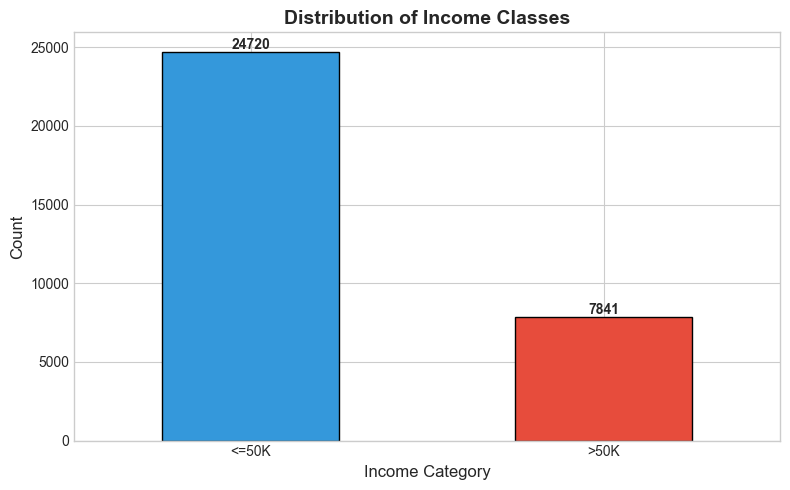


** KEY INSIGHT: The dataset is IMBALANCED - more people earn <=50K than >50K **


In [8]:
# Distribution of the target variable
print("Income Distribution:")
print("=" * 30)
income_counts = df['income'].value_counts()
print(income_counts)
print(f"\nPercentages:")
print(df['income'].value_counts(normalize=True).round(3) * 100)

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#3498db', '#e74c3c']
income_counts.plot(kind='bar', color=colors, edgecolor='black', ax=ax)
ax.set_title('Distribution of Income Classes', fontsize=14, fontweight='bold')
ax.set_xlabel('Income Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add count labels on bars
for i, v in enumerate(income_counts):
    ax.text(i, v + 200, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n** KEY INSIGHT: The dataset is IMBALANCED - more people earn <=50K than >50K **")

### 2.4 Visualizing Numerical Features

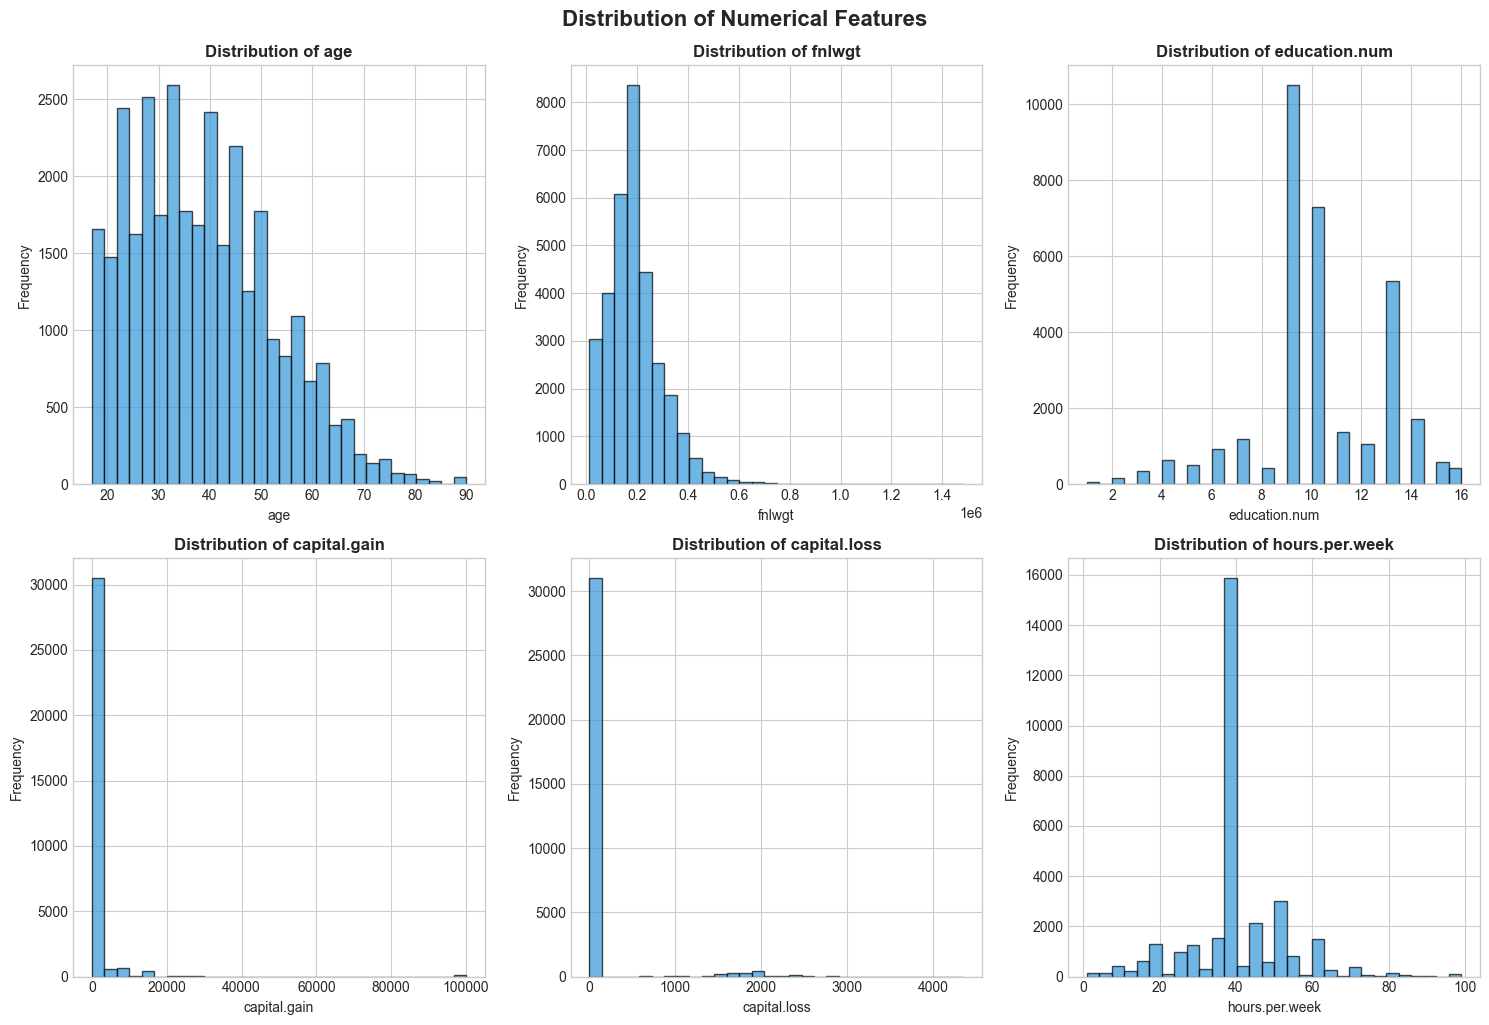

In [9]:
# Distribution of key numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    df[col].hist(bins=30, ax=ax, color='#3498db', edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

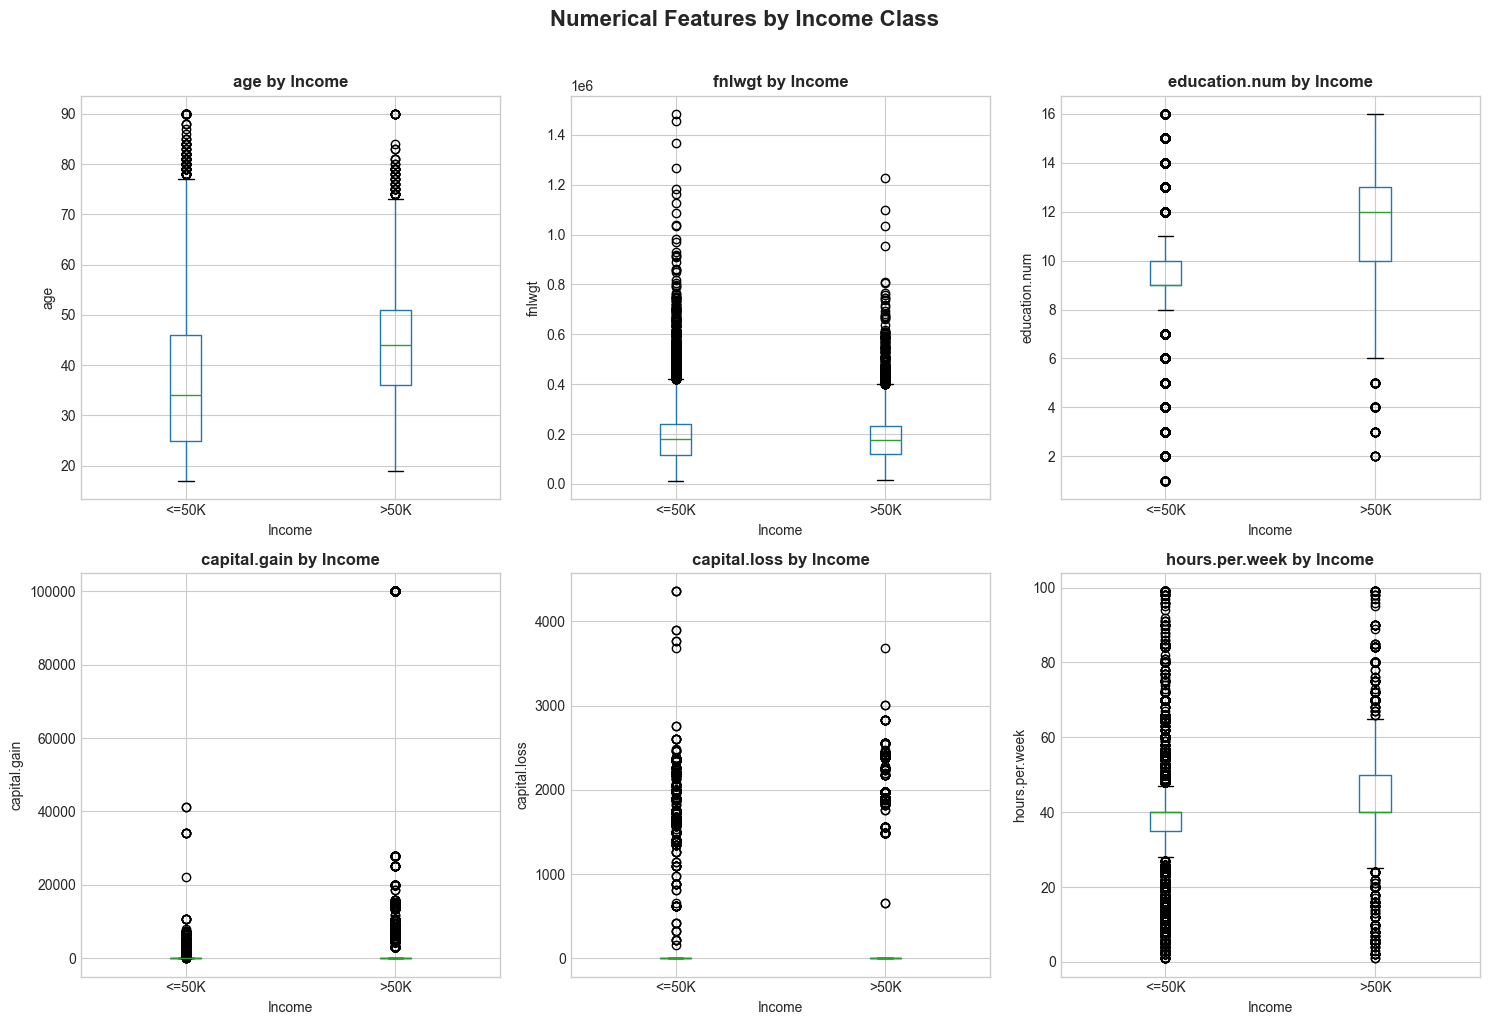

** KEY INSIGHT: People earning >50K tend to be older and have more education years **


In [10]:
# Box plots to see numerical features by income category
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    df.boxplot(column=col, by='income', ax=ax)
    ax.set_title(f'{col} by Income', fontsize=12, fontweight='bold')
    ax.set_xlabel('Income')
    ax.set_ylabel(col)

plt.tight_layout()
plt.suptitle('Numerical Features by Income Class', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("** KEY INSIGHT: People earning >50K tend to be older and have more education years **")

### 2.5 Visualizing Categorical Features

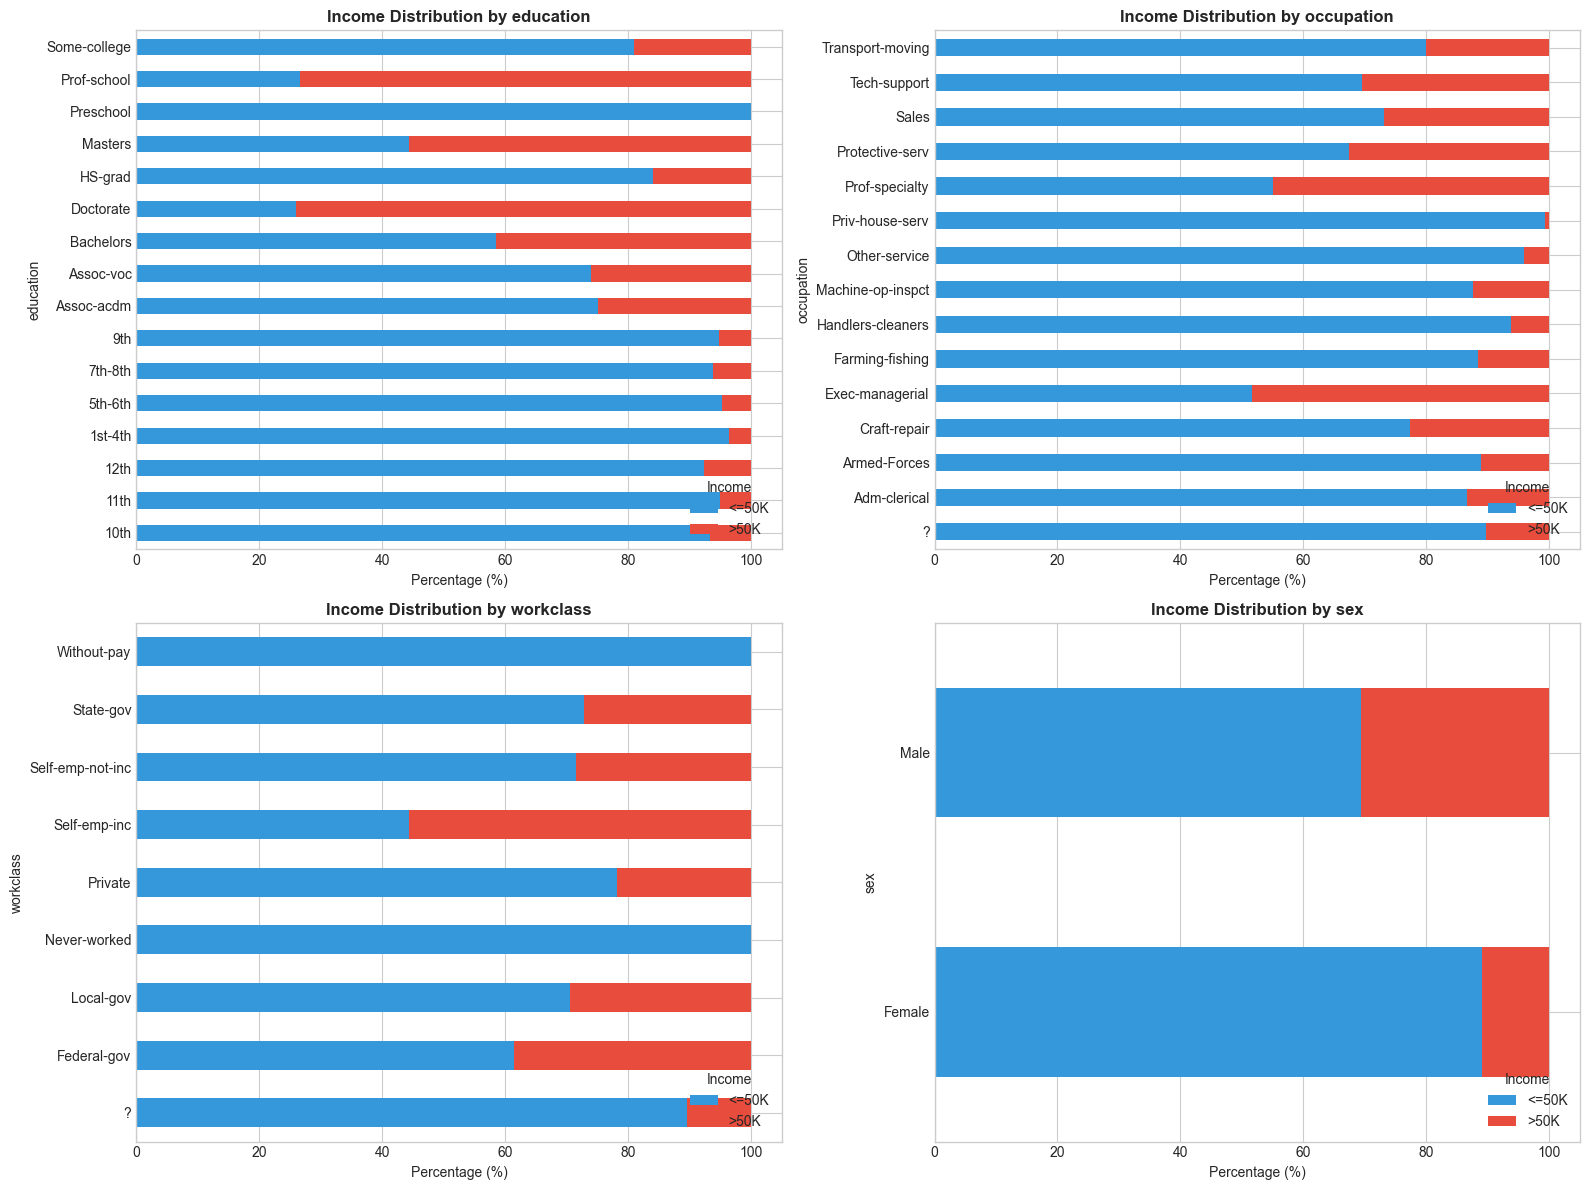

In [11]:
# Explore some key categorical features
key_categorical = ['education', 'occupation', 'workclass', 'sex']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(key_categorical):
    ax = axes[idx]
    
    # Calculate income distribution per category
    cross_tab = pd.crosstab(df[col], df['income'], normalize='index') * 100
    cross_tab.plot(kind='barh', stacked=True, ax=ax, color=['#3498db', '#e74c3c'])
    
    ax.set_title(f'Income Distribution by {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Percentage (%)')
    ax.set_ylabel(col)
    ax.legend(title='Income', loc='lower right')

plt.tight_layout()
plt.show()

### 2.6 Correlation Analysis

Let's see how numerical features relate to each other.

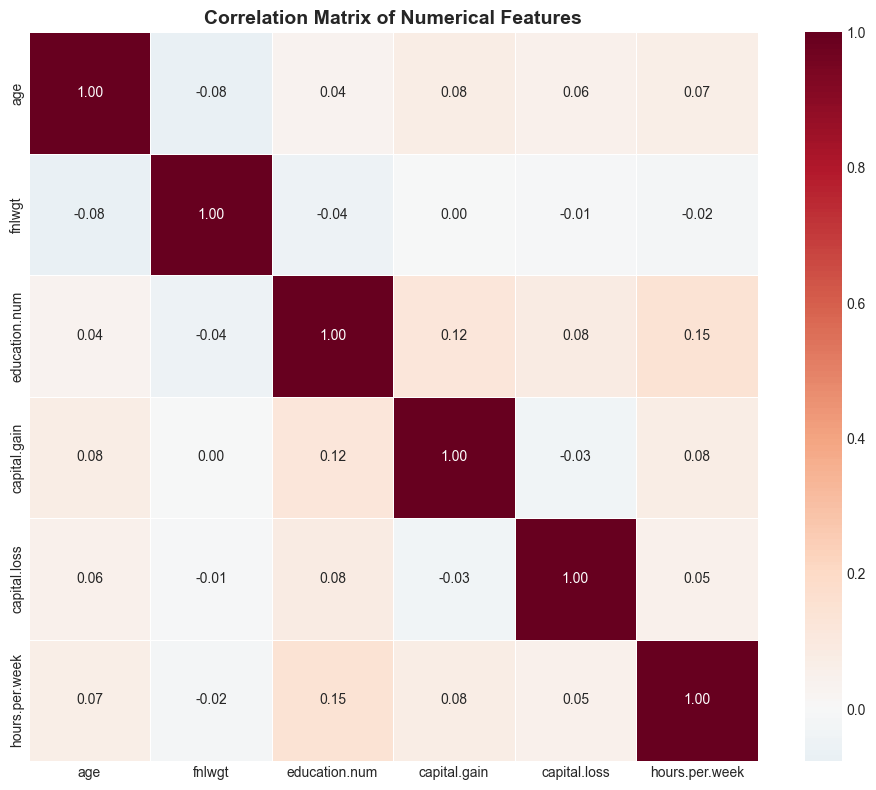

** KEY INSIGHT: education.num is strongly correlated with education level **
** This makes sense - they represent the same information in different formats **


In [12]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("** KEY INSIGHT: education.num is strongly correlated with education level **")
print("** This makes sense - they represent the same information in different formats **")

---
## Part 3: Data Cleaning and Preprocessing

Real-world data is messy! We need to:
1. Handle missing values
2. Encode categorical variables
3. Scale numerical features
4. Split data into training and testing sets

### 3.1 Handling Missing Values

In [13]:
# Check for missing values (including '?' which represents missing in this dataset)
print("Missing Values Analysis:")
print("=" * 50)

# Standard NA values
print("\nStandard NA values per column:")
print(df.isna().sum())

# Check for '?' values (common in this dataset)
print("\n'?' values (also represents missing):")
for col in df.columns:
    if df[col].dtype == 'object':
        question_marks = (df[col] == '?').sum()
        if question_marks > 0:
            print(f"  {col}: {question_marks} missing values ({question_marks/len(df)*100:.1f}%)")

Missing Values Analysis:

Standard NA values per column:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

'?' values (also represents missing):
  workclass: 1836 missing values (5.6%)
  occupation: 1843 missing values (5.7%)
  native.country: 583 missing values (1.8%)


In [14]:
# Create a clean copy of our data
df_clean = df.copy()

# Replace '?' with NaN for proper handling
df_clean = df_clean.replace('?', np.nan)

# Count total missing
total_missing = df_clean.isna().sum().sum()
print(f"Total missing values: {total_missing}")
print(f"Percentage of data with at least one missing value: {df_clean.isna().any(axis=1).sum()/len(df_clean)*100:.1f}%")

Total missing values: 4262
Percentage of data with at least one missing value: 7.4%


In [15]:
# Strategy: For this tutorial, we'll drop rows with missing values
# In practice, you might want to impute (fill in) missing values instead

print(f"Rows before cleaning: {len(df_clean)}")
df_clean = df_clean.dropna()
print(f"Rows after cleaning: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)} ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

Rows before cleaning: 32561
Rows after cleaning: 30162
Rows removed: 2399 (7.4%)


### 3.2 Encoding Categorical Variables

Machine learning algorithms work with numbers, not text. We need to convert categorical variables.

**Two main approaches:**
- **Label Encoding**: Convert categories to numbers (0, 1, 2, ...)
- **One-Hot Encoding**: Create binary columns for each category

In [16]:
# First, let's encode our target variable (income)
# We'll create a binary variable: 1 for >50K, 0 for <=50K

print("Encoding target variable:")
print(f"  Before: {df_clean['income'].unique()}")

df_clean['income_binary'] = (df_clean['income'] == '>50K').astype(int)

print(f"  After: 0 = '<=50K', 1 = '>50K'")
print(f"\nValue counts:")
print(df_clean['income_binary'].value_counts())

Encoding target variable:
  Before: ['<=50K' '>50K']
  After: 0 = '<=50K', 1 = '>50K'

Value counts:
income_binary
0    22654
1     7508
Name: count, dtype: int64


In [17]:
# For features, we'll use One-Hot Encoding
# This creates new columns for each category

# Select features for our models
# We'll drop some columns that are redundant or not useful
columns_to_drop = ['income', 'income_binary', 'fnlwgt', 'education']  # fnlwgt is sampling weight, education is redundant with education.num

# Identify which columns to encode
categorical_to_encode = [col for col in categorical_cols if col not in columns_to_drop + ['income']]

print("Categorical columns to one-hot encode:")
for col in categorical_to_encode:
    print(f"  - {col}: {df_clean[col].nunique()} categories")

Categorical columns to one-hot encode:
  - workclass: 7 categories
  - marital.status: 7 categories
  - occupation: 14 categories
  - relationship: 6 categories
  - race: 5 categories
  - sex: 2 categories
  - native.country: 41 categories


In [18]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_to_encode, drop_first=True)

print(f"Original columns: {len(df_clean.columns)}")
print(f"After encoding: {len(df_encoded.columns)} columns")
print(f"\nSample of new column names:")
print([col for col in df_encoded.columns if 'workclass' in col])

Original columns: 16
After encoding: 84 columns

Sample of new column names:
['workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay']


### 3.3 Preparing Features and Target Variables

In [19]:
# Define our feature matrix (X) and target variables (y)

# For CLASSIFICATION (Logistic Regression): predict income_binary
# For REGRESSION (Linear Regression): predict hours-per-week (as a demonstration)

# Remove target and non-feature columns
columns_to_exclude = ['income', 'income_binary', 'fnlwgt', 'education']
feature_columns = [col for col in df_encoded.columns if col not in columns_to_exclude]

# Classification task: Predict income
X_classification = df_encoded[feature_columns].drop(columns=['hours.per.week'], errors='ignore')
y_classification = df_encoded['income_binary']

# Regression task: Predict hours-per-week
X_regression = df_encoded[feature_columns].drop(columns=['hours.per.week'])
y_regression = df_encoded['hours.per.week']

print("Classification Task:")
print(f"  Features shape: {X_classification.shape}")
print(f"  Target shape: {y_classification.shape}")
print(f"  Target distribution: {y_classification.value_counts().to_dict()}")

print("\nRegression Task:")
print(f"  Features shape: {X_regression.shape}")
print(f"  Target shape: {y_regression.shape}")
print(f"  Target range: {y_regression.min()} to {y_regression.max()} hours/week")

Classification Task:
  Features shape: (30162, 79)
  Target shape: (30162,)
  Target distribution: {0: 22654, 1: 7508}

Regression Task:
  Features shape: (30162, 79)
  Target shape: (30162,)
  Target range: 1 to 99 hours/week


### 3.4 Train-Test Split

We split our data into:
- **Training set**: Used to train the model (learn patterns)
- **Test set**: Used to evaluate the model (never seen during training)

This prevents **overfitting** - when a model memorizes training data but fails on new data.

In [20]:
# Split data: 80% training, 20% testing
# random_state ensures reproducibility

# For Classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, 
    test_size=0.2, 
    random_state=42,
    stratify=y_classification  # Maintain class proportions
)

# For Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, 
    test_size=0.2, 
    random_state=42
)

print("Data Split Summary:")
print("=" * 50)
print(f"Training samples: {len(X_train_clf)} ({len(X_train_clf)/len(X_classification)*100:.0f}%)")
print(f"Testing samples: {len(X_test_clf)} ({len(X_test_clf)/len(X_classification)*100:.0f}%)")
print(f"\nClass distribution in training set:")
print(y_train_clf.value_counts(normalize=True).round(3))

Data Split Summary:
Training samples: 24129 (80%)
Testing samples: 6033 (20%)

Class distribution in training set:
income_binary
0    0.751
1    0.249
Name: proportion, dtype: float64


### 3.5 Feature Scaling

Many algorithms work better when features are on the same scale. **StandardScaler** transforms features to have:
- Mean = 0
- Standard deviation = 1

In [21]:
# Initialize scalers (one for each task to avoid data leakage)
scaler_clf = StandardScaler()
scaler_reg = StandardScaler()

# Fit on training data and transform both training and test data
# IMPORTANT: Only fit on training data to prevent data leakage!

X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("Feature Scaling Complete!")
print("\nExample - 'age' feature before and after scaling:")
age_idx = list(X_train_clf.columns).index('age')
print(f"  Before: mean={X_train_clf['age'].mean():.2f}, std={X_train_clf['age'].std():.2f}")
print(f"  After: mean={X_train_clf_scaled[:, age_idx].mean():.2f}, std={X_train_clf_scaled[:, age_idx].std():.2f}")

Feature Scaling Complete!

Example - 'age' feature before and after scaling:
  Before: mean=38.49, std=13.17
  After: mean=-0.00, std=1.00


---
## Part 4: Linear Regression

### What is Linear Regression?

Linear Regression finds a line (or hyperplane in higher dimensions) that best fits the data.

**The equation:**
$$y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$

Where:
- $y$ is the predicted value
- $w_0$ is the intercept (bias)
- $w_1, w_2, ..., w_n$ are the coefficients (weights) for each feature

**Goal:** Find coefficients that minimize the difference between predicted and actual values.

### Task: Predict Hours Worked Per Week

In [22]:
# Create and train the Linear Regression model
print("Training Linear Regression Model...")
print("=" * 50)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_scaled, y_train_reg)

print("Model trained successfully!")
print(f"\nModel parameters:")
print(f"  Intercept (beta_0): {linear_model.intercept_:.4f}")
print(f"  Number of coefficients: {len(linear_model.coef_)}")

Training Linear Regression Model...
Model trained successfully!

Model parameters:
  Intercept (beta_0): 40.9294
  Number of coefficients: 79


In [23]:
# Make predictions on the test set
y_pred_reg = linear_model.predict(X_test_reg_scaled)

print("Predictions made!")
print(f"\nSample predictions vs actual:")
print("-" * 40)
for i in range(5):
    print(f"  Predicted: {y_pred_reg[i]:.1f} hours | Actual: {y_test_reg.iloc[i]:.1f} hours")

Predictions made!

Sample predictions vs actual:
----------------------------------------
  Predicted: 44.0 hours | Actual: 40.0 hours
  Predicted: 42.3 hours | Actual: 40.0 hours
  Predicted: 31.5 hours | Actual: 40.0 hours
  Predicted: 41.5 hours | Actual: 40.0 hours
  Predicted: 44.6 hours | Actual: 40.0 hours


### Evaluating Linear Regression

**Key metrics:**

1. **Mean Squared Error (MSE)**: Average of squared differences between predicted and actual values
   - Lower is better
   - Penalizes large errors more

2. **Root Mean Squared Error (RMSE)**: Square root of MSE
   - Same units as the target variable
   - Easier to interpret

3. **R² Score (Coefficient of Determination)**:
   - Ranges from 0 to 1 (can be negative for very bad models)
   - 1 = perfect predictions
   - 0 = model is no better than predicting the mean

In [25]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("Linear Regression Evaluation:")
print("=" * 50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} hours")
print(f"\nInterpretation:")
print(f"  - On average, predictions are off by about {rmse:.1f} hours")


Linear Regression Evaluation:
Mean Squared Error (MSE): 117.6147
Root Mean Squared Error (RMSE): 10.8450 hours

Interpretation:
  - On average, predictions are off by about 10.8 hours


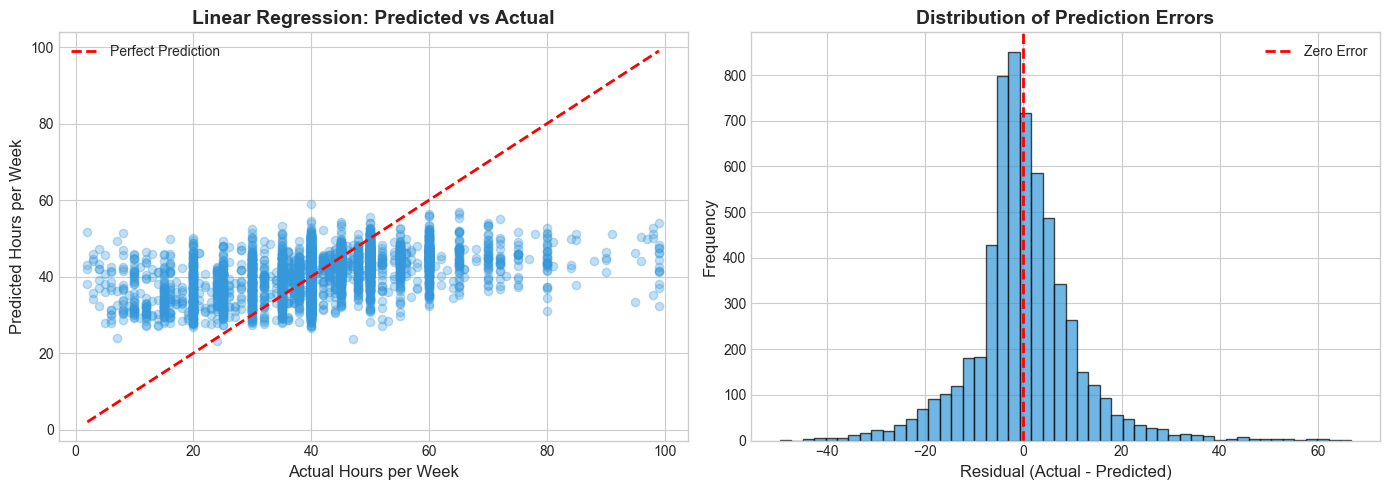

** INSIGHT: Residuals should be centered around 0 and roughly normally distributed **


In [26]:
# Visualize: Predicted vs Actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scatter plot of predictions vs actual
ax1 = axes[0]
ax1.scatter(y_test_reg, y_pred_reg, alpha=0.3, color='#3498db')
ax1.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Hours per Week', fontsize=12)
ax1.set_ylabel('Predicted Hours per Week', fontsize=12)
ax1.set_title('Linear Regression: Predicted vs Actual', fontsize=14, fontweight='bold')
ax1.legend()

# Plot 2: Residuals distribution
ax2 = axes[1]
residuals = y_test_reg - y_pred_reg
ax2.hist(residuals, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_xlabel('Residual (Actual - Predicted)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

print("** INSIGHT: Residuals should be centered around 0 and roughly normally distributed **")

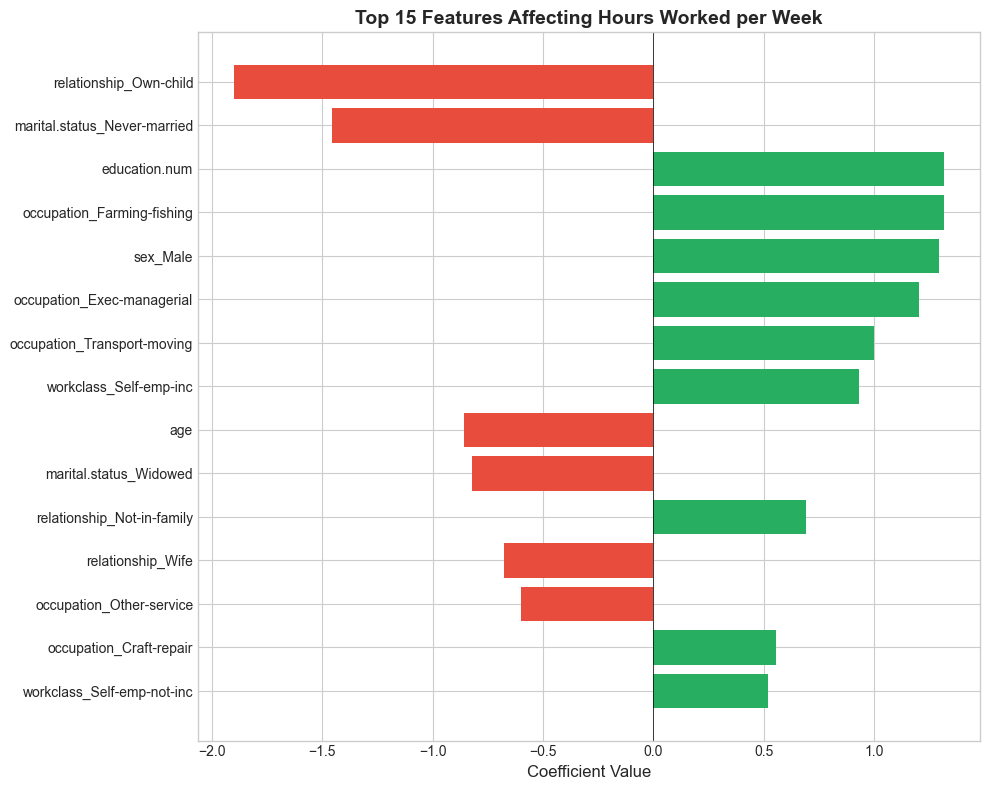

Green = Positive effect (increases hours)
Red = Negative effect (decreases hours)


In [40]:
# Feature importance: Which features most influence hours worked?
feature_importance = pd.DataFrame({
    'feature': X_train_reg.columns,
    'coefficient': linear_model.coef_
})
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

# Plot top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 8))
colors = ['#e74c3c' if x < 0 else '#27ae60' for x in top_features['coefficient']]
plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 15 Features Affecting Hours Worked per Week', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Green = Positive effect (increases hours)")
print("Red = Negative effect (decreases hours)")

---
## Part 5: Logistic Regression

### What is Logistic Regression?

Despite its name, Logistic Regression is used for **classification**, not regression!

It predicts the **probability** that an instance belongs to a particular class using the **sigmoid function**:

$$P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)}}$$

**Key properties:**
- Output is always between 0 and 1 (a probability)
- Typically, if P > 0.5, predict class 1; otherwise, predict class 0

### Task: Predict Income Class (>50K or <=50K)

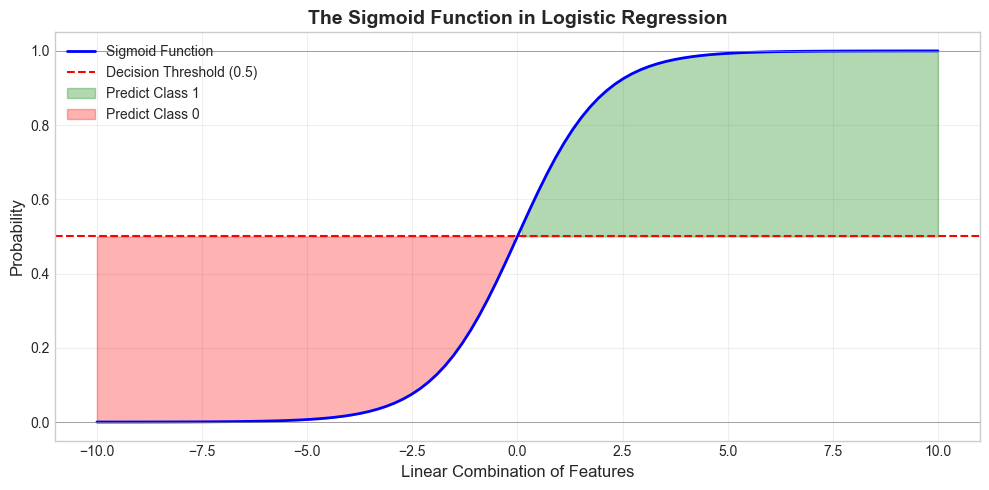

In [29]:
# Visualize the sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid, 'b-', linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Threshold (0.5)')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.axhline(y=1, color='gray', linestyle='-', linewidth=0.5)
plt.fill_between(x, sigmoid, 0.5, where=(sigmoid >= 0.5), alpha=0.3, color='green', label='Predict Class 1')
plt.fill_between(x, sigmoid, 0.5, where=(sigmoid < 0.5), alpha=0.3, color='red', label='Predict Class 0')
plt.xlabel('Linear Combination of Features', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('The Sigmoid Function in Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Create and train the Logistic Regression model
print("Training Logistic Regression Model...")
print("=" * 50)

logistic_model = LogisticRegression(
    max_iter=1000,  # Maximum iterations for convergence
    random_state=42
)
logistic_model.fit(X_train_clf_scaled, y_train_clf)

print("Model trained successfully!")
print(f"\nModel parameters:")
print(f"  Intercept: {logistic_model.intercept_[0]:.4f}")
print(f"  Number of coefficients: {len(logistic_model.coef_[0])}")

Training Logistic Regression Model...
Model trained successfully!

Model parameters:
  Intercept: -1.9101
  Number of coefficients: 79


In [31]:
# Make predictions
y_pred_clf = logistic_model.predict(X_test_clf_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_clf_scaled)[:, 1]  # Probability of class 1

print("Predictions made!")
print(f"\nSample predictions:")
print("-" * 60)
print(f"{'Probability':>12} | {'Predicted':>10} | {'Actual':>8}")
print("-" * 60)
for i in range(5):
    pred_label = '>50K' if y_pred_clf[i] == 1 else '<=50K'
    actual_label = '>50K' if y_test_clf.iloc[i] == 1 else '<=50K'
    print(f"{y_pred_proba[i]:>12.4f} | {pred_label:>10} | {actual_label:>8}")

Predictions made!

Sample predictions:
------------------------------------------------------------
 Probability |  Predicted |   Actual
------------------------------------------------------------
      0.5718 |       >50K |    <=50K
      0.3469 |      <=50K |    <=50K
      0.7763 |       >50K |     >50K
      0.0330 |      <=50K |    <=50K
      0.0252 |      <=50K |    <=50K


### Evaluating Logistic Regression

**Key metrics for classification:**

1. **Accuracy**: Percentage of correct predictions

2. **Precision**: Of all positive predictions, how many were actually positive?
   - High precision = Few false positives

3. **Recall (Sensitivity)**: Of all actual positives, how many did we catch?
   - High recall = Few false negatives

4. **F1-Score**: Harmonic mean of precision and recall

5. **ROC-AUC**: Area under the ROC curve (trade-off between true positive rate and false positive rate)

In [32]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
auc_score = roc_auc_score(y_test_clf, y_pred_proba)

print("Logistic Regression Evaluation:")
print("=" * 50)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"ROC-AUC Score: {auc_score:.4f}")
print(f"\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test_clf, y_pred_clf, target_names=['<=50K', '>50K']))

Logistic Regression Evaluation:
Accuracy: 0.8492 (84.92%)
ROC-AUC Score: 0.9095

Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4531
        >50K       0.74      0.61      0.67      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.84      0.85      0.84      6033



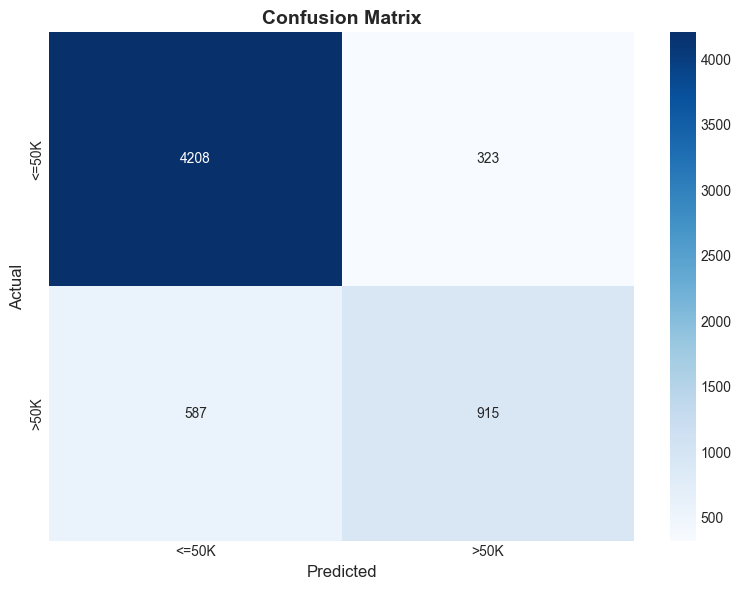

Confusion Matrix Interpretation:
True Negatives (TN):  4208 - Correctly predicted <=50K
False Positives (FP): 323 - Incorrectly predicted >50K
False Negatives (FN): 587 - Incorrectly predicted <=50K
True Positives (TP):  915 - Correctly predicted >50K


In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpret the confusion matrix
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix Interpretation:")
print("=" * 50)
print(f"True Negatives (TN):  {tn} - Correctly predicted <=50K")
print(f"False Positives (FP): {fp} - Incorrectly predicted >50K")
print(f"False Negatives (FN): {fn} - Incorrectly predicted <=50K")
print(f"True Positives (TP):  {tp} - Correctly predicted >50K")

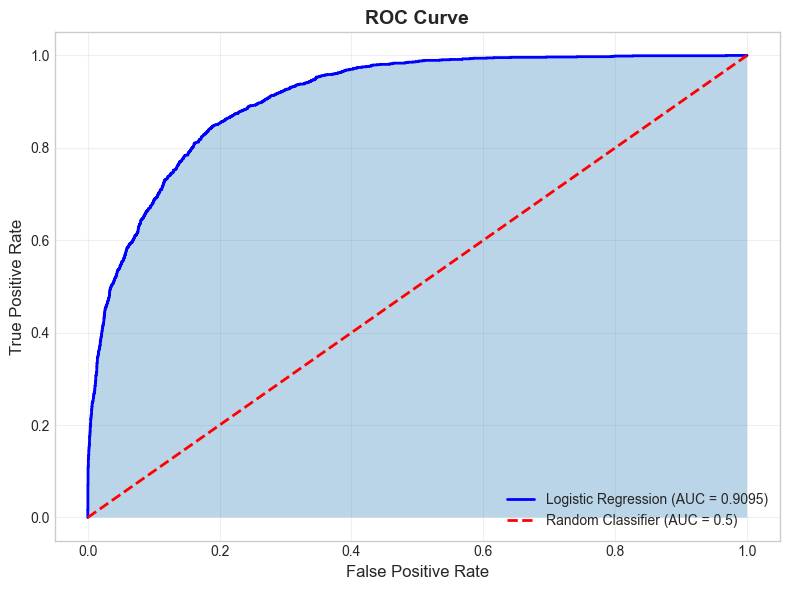

** ROC Curve shows the trade-off between True Positive Rate and False Positive Rate **
** The more the curve bows toward the top-left, the better the model **


In [34]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'Logistic Regression (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("** ROC Curve shows the trade-off between True Positive Rate and False Positive Rate **")
print("** The more the curve bows toward the top-left, the better the model **")

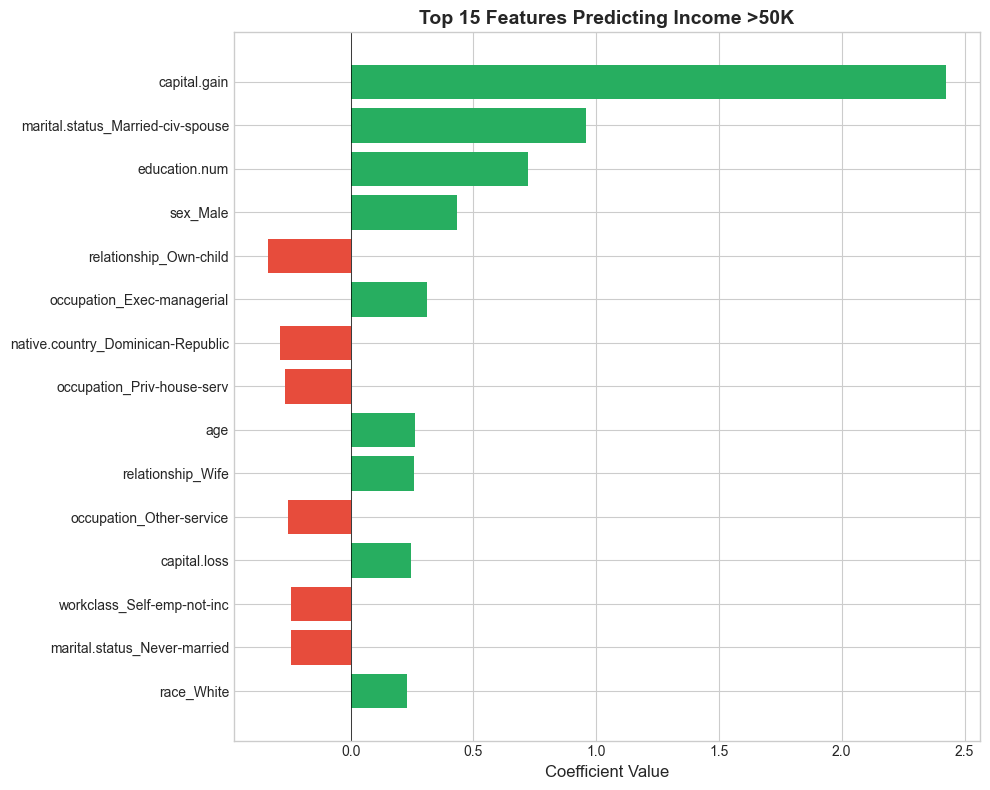

Green = Increases probability of earning >50K
Red = Decreases probability of earning >50K


In [35]:
# Feature importance for Logistic Regression
feature_importance_clf = pd.DataFrame({
    'feature': X_train_clf.columns,
    'coefficient': logistic_model.coef_[0]
})
feature_importance_clf['abs_coefficient'] = abs(feature_importance_clf['coefficient'])
feature_importance_clf = feature_importance_clf.sort_values('abs_coefficient', ascending=False)

# Plot top 15 features
top_features_clf = feature_importance_clf.head(15)

plt.figure(figsize=(10, 8))
colors = ['#e74c3c' if x < 0 else '#27ae60' for x in top_features_clf['coefficient']]
plt.barh(range(len(top_features_clf)), top_features_clf['coefficient'], color=colors)
plt.yticks(range(len(top_features_clf)), top_features_clf['feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 15 Features Predicting Income >50K', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Green = Increases probability of earning >50K")
print("Red = Decreases probability of earning >50K")

---
## Part 6: Model Comparison and Summary

Let's summarize what we've learned and compare our models.

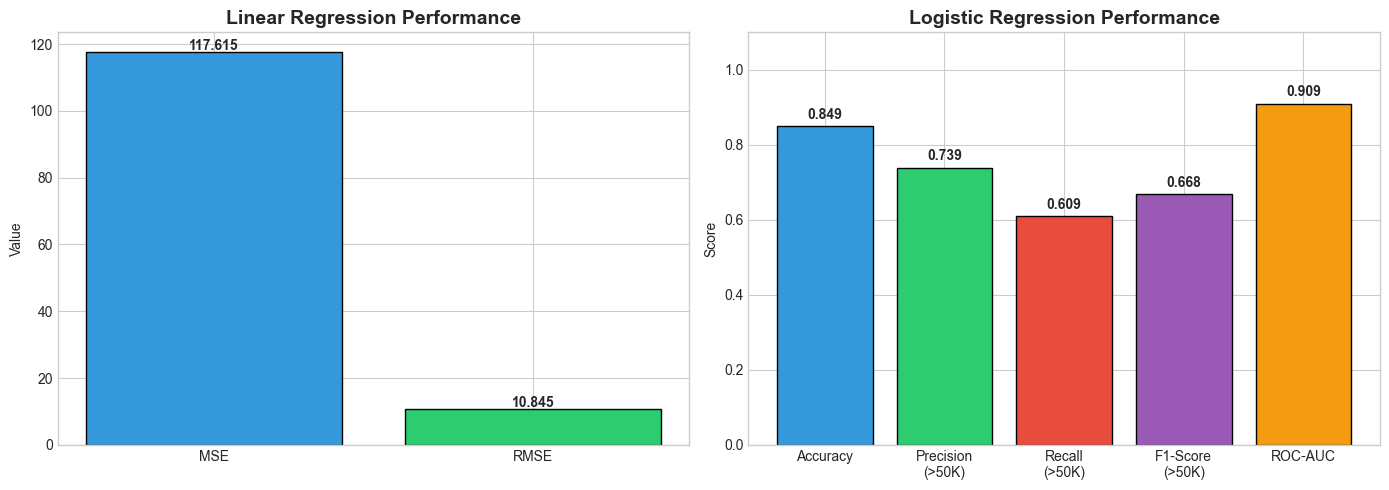

In [37]:
# Summary visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression Summary
ax1 = axes[0]
metrics_reg = ['MSE', 'RMSE']
values_reg = [mse, rmse]
colors_reg = ['#3498db', '#2ecc71']
bars1 = ax1.bar(metrics_reg, values_reg, color=colors_reg, edgecolor='black')
ax1.set_title('Linear Regression Performance', fontsize=14, fontweight='bold')
ax1.set_ylabel('Value')
for bar, val in zip(bars1, values_reg):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.3f}', ha='center', fontweight='bold')

# Logistic Regression Summary
ax2 = axes[1]
report = classification_report(y_test_clf, y_pred_clf, output_dict=True)
# Use numeric keys '0' and '1' since that's what output_dict returns
metrics_clf = ['Accuracy', 'Precision\n(>50K)', 'Recall\n(>50K)', 'F1-Score\n(>50K)', 'ROC-AUC']
values_clf = [accuracy, report['1']['precision'], report['1']['recall'], 
              report['1']['f1-score'], auc_score]
colors_clf = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12']
bars2 = ax2.bar(metrics_clf, values_clf, color=colors_clf, edgecolor='black')
ax2.set_title('Logistic Regression Performance', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score')
ax2.set_ylim(0, 1.1)
for bar, val in zip(bars2, values_clf):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [38]:
# Final Summary
print("="*70)
print("                    MACHINE LEARNING TUTORIAL SUMMARY")
print("="*70)

print("\n1. DATA EXPLORATION")
print("-"*70)
print(f"   - Dataset: {len(df)} samples, {len(df.columns)} features")
print(f"   - After cleaning: {len(df_clean)} samples")
print(f"   - Numerical features: {len(numerical_cols)}")
print(f"   - Categorical features: {len(categorical_cols)}")

print("\n2. PREPROCESSING STEPS")
print("-"*70)
print("   - Handled missing values (removed rows with '?')")
print("   - Encoded categorical variables (one-hot encoding)")
print("   - Split data: 80% training, 20% testing")
print("   - Scaled features (StandardScaler)")

print("\n3. LINEAR REGRESSION (Predicting Hours Worked)")
print("-"*70)
print(f"   - MSE: {mse:.2f}")
print(f"   - RMSE: {rmse:.2f} hours")
print(f"   - Top predictors: {', '.join(feature_importance.head(3)['feature'].tolist())}")

print("\n4. LOGISTIC REGRESSION (Predicting Income >50K)")
print("-"*70)
print(f"   - Accuracy: {accuracy*100:.2f}%")
print(f"   - ROC-AUC: {auc_score:.4f}")
print(f"   - Precision (>50K): {report['1']['precision']*100:.1f}%")
print(f"   - Recall (>50K): {report['1']['recall']*100:.1f}%")
print(f"   - Top predictors: {', '.join(feature_importance_clf.head(3)['feature'].tolist())}")

print("\n5. KEY TAKEAWAYS")
print("-"*70)
print("   - Linear Regression: Best for continuous target variables")
print("   - Logistic Regression: Best for binary classification")
print("   - Data preprocessing is crucial for model performance")
print("   - Always evaluate on held-out test data to avoid overfitting")
print("   - Feature importance helps interpret what the model learned")
print("="*70)

                    MACHINE LEARNING TUTORIAL SUMMARY

1. DATA EXPLORATION
----------------------------------------------------------------------
   - Dataset: 32561 samples, 15 features
   - After cleaning: 30162 samples
   - Numerical features: 6
   - Categorical features: 9

2. PREPROCESSING STEPS
----------------------------------------------------------------------
   - Handled missing values (removed rows with '?')
   - Encoded categorical variables (one-hot encoding)
   - Split data: 80% training, 20% testing
   - Scaled features (StandardScaler)

3. LINEAR REGRESSION (Predicting Hours Worked)
----------------------------------------------------------------------
   - MSE: 117.61
   - RMSE: 10.85 hours
   - Top predictors: relationship_Own-child, marital.status_Never-married, education.num

4. LOGISTIC REGRESSION (Predicting Income >50K)
----------------------------------------------------------------------
   - Accuracy: 84.92%
   - ROC-AUC: 0.9095
   - Precision (>50K): 73.9%


---
## Exercises for Practice

Try these exercises to deepen your understanding:

1. **Change the test size**: What happens to model performance if you use 30% for testing instead of 20%?

2. **Handle missing values differently**: Instead of dropping rows, try imputing (filling in) missing values with the mode (most common value) for categorical columns.

3. **Feature engineering**: Create a new feature like "is_married" (1 if marital status contains "Married", 0 otherwise) and see if it improves the model.

4. **Try different thresholds**: For logistic regression, what happens to precision and recall if you use 0.3 or 0.7 as the classification threshold instead of 0.5?

5. **Remove outliers**: Try removing extreme values from numerical features (e.g., age > 80) and see how it affects the model.

---